# Week 1 class

The aim of this class is to implement the Fibonacci algorithm using the following methods, and plot their timings (for $n=1$ to 100, except for the recursive algorithm where you should stop at $n=30$):

* Recursive
* Table
* Keep last two values
* Analytic (if you have time)
* Matrix (if you have time)

## Python

You can use any language you like, but I'll use Python for all my code samples and during the class. I think Python is very simple syntactically so the code samples should be easy enough to follow even if you don't know Python. On the other hand, I would strongly encourage you to learn it as it's an incredibly useful language. Here is a nice tutorial on Python, NumPy (numerical library for efficient array computation) and Jupyter (the notebook interface I'm using here):

* [Python Numpy Jupyter tutorial](https://cs231n.github.io/python-numpy-tutorial/)

Here is a little sample of plotting timings for a function in Python.

In [3]:
# this first line is just used to make the plots appear nicely in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

def fake_function(n):
    time.sleep(0.001*n*n)

def rec_fib(n):
    if n <= 2:
        return 1
    else:
        return rec_fib(n-1) + rec_fib(n-2)

def table_fib(n):
    start = [1, 1]
    for _ in range(3, n+1):
        start.append(start[-1] + start[-2])
    return start

def keep_last_two_fib(n):
    first, second = 1, 1
    for _ in range(3, n+1):
        new = first + second
        first = second
        second = new
    return second

def analytic_fib(n):
    phi = (1 + np.sqrt(5)) / 2
    return 1/np.sqrt(5) * (phi**n - (1 - phi)**n)


# possible improvement: let n = n - 1
# and return res[0,0] (which is equal to fib(n+1))
# see definition of matrix method
def matrix_fib(n):
    mat = np.matrix([[1, 1], [1, 0]])
    res = np.matrix([[1, 0], [0, 1]])
    while n:
        if n & 1:
            res *= mat
        mat = mat * mat
        n >>= 1
    return res[0,1]
        

In [4]:
for i in range(10):
    print(i, matrix_fib(i))

0 0
1 1
2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34


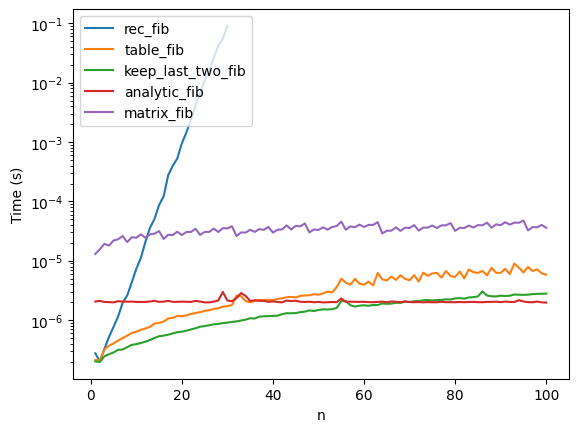

In [10]:
def timeit(n, fn):
    until = 0.01 # seconds
    reps = 0
    start = time.time()
    while (time.time() - start) < until:
        fn(n)
        reps += 1
    end = time.time()
    return (end-start)/reps

for f, N in zip([rec_fib, table_fib, keep_last_two_fib, analytic_fib, matrix_fib], [30, 100, 100, 100, 100]):
    inputs = list(range(1, N+1))
    plt.semilogy(inputs, list(map(lambda x: timeit(x, f), inputs)), label=f.__name__)
plt.xlabel('n')
plt.ylabel('Time (s)');
plt.legend(loc='upper left')

## Implementation notes on compiled languages

For the other ones, if you're using a compiled language, they might run so fast that in order to time them you should slow down the addition by adding a 1 microsecond wait. I've included a C++ ``busy_sleep`` function below to do that.

```c++
#include <chrono>
#include <iostream>
#include <fstream>

using namespace std;

// this function busy sleeps for n microseconds
void busy_sleep(int n)
{
    auto start = chrono::steady_clock::now();
    while(chrono::duration_cast<chrono::microseconds>(chrono::steady_clock::now() - start).count()<n) {};
}
```